In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")


In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


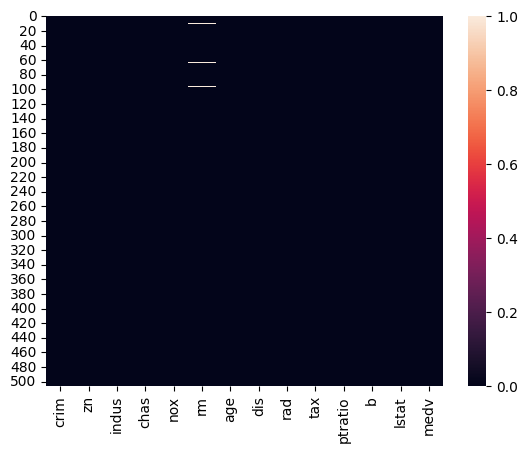

In [3]:
#its difficult to view the above results. Lets convert the null values test to a visualisation.
import seaborn as sns

sns.heatmap(df.isnull());

Observations:
* rm column is also having some null values
Lets replace it with the average or rm


<Axes: ylabel='rm'>

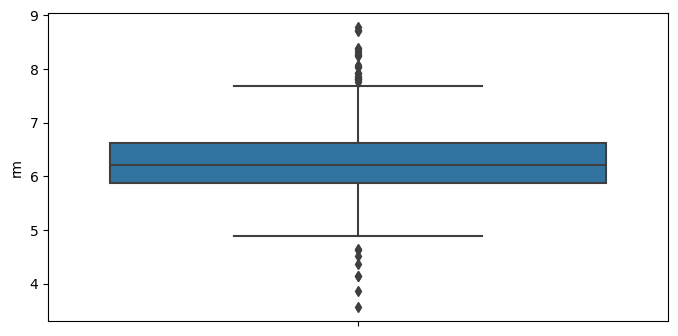

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize = (8,4))
sns.boxplot( y = "rm" , data = df)

In [5]:
##Function to impute the average age per passenger class in the null values of age

def impute_rm(cols):
    rm = cols[0]
    
    if pd.isnull(rm):
        return 6.2
    else:
        return rm
    
df["rm"] = df[["rm"]].apply(impute_rm, axis = 1)

/tmp/ipykernel_33/2034904766.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rm = cols[0]


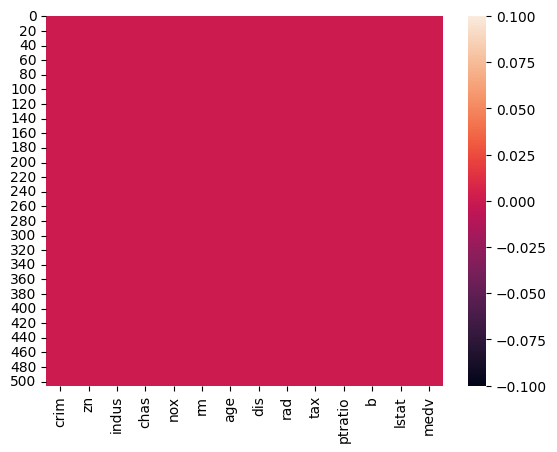

In [6]:
#its difficult to view the above results. Lets convert the null values test to a visualisation.
import seaborn as sns

sns.heatmap(df.isnull());

All nulls in rm column has been replaced now with the average value of the rm

In [7]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [8]:
#Splitting into dependent and independent variables
y = df["medv"]
x = df.drop("medv", axis = 1)

In [9]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

# Train Test Split 

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [12]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
np.count_nonzero(np.isnan(x_train))

0

### Cross Validation
* https://scikit-learn.org/stable/modules/model_evaluation.html

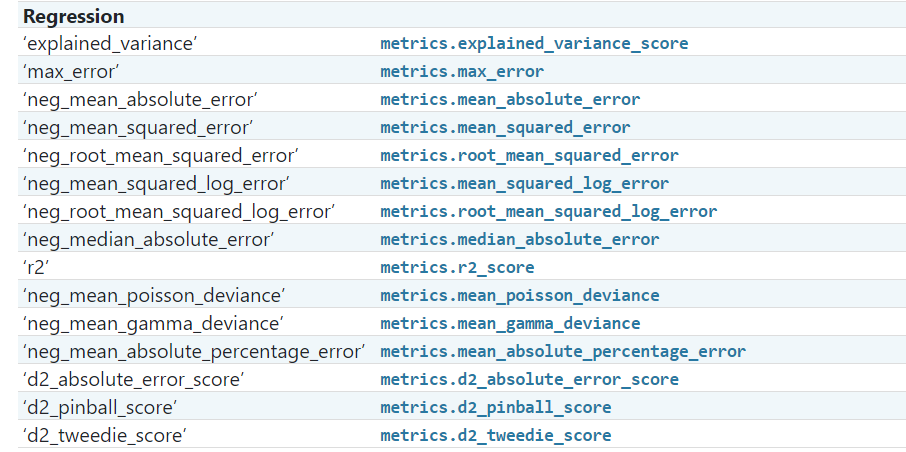

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
regression = LinearRegression()
regression.fit(x_train,y_train)
mse = cross_val_score(regression, x_train, y_train, scoring="neg_mean_squared_error", cv = 10 )


## Mean squared error

In [19]:
np.mean(mse)

-25.55685496566153

## Prediction 

In [20]:
reg_predict = regression.predict(x_test)

In [22]:
reg_predict

array([28.63832236, 36.47782746, 15.43956657, 25.38996406, 18.85913395,
       23.15474507, 17.4003373 , 14.08997759, 23.04453764, 20.59271655,
       24.83631073, 18.56097264, -6.85819295, 21.81040463, 19.22551919,
       26.18703719, 20.29259111,  5.62418233, 40.44066203, 17.58269993,
       27.4216897 , 30.15550493, 10.94785384, 24.00669409, 18.07632017,
       15.94086495, 23.1240252 , 14.56139191, 22.34587329, 19.31872488,
       22.15915747, 25.18414664, 25.3102834 , 18.51157614, 16.63095142,
       17.51600731, 30.94736336, 20.1796162 , 23.90605803, 24.85712737,
       13.93485651, 31.80441635, 42.55958674, 17.62719995, 27.00384813,
       17.19231234, 13.80779911, 26.09072849, 20.32191813, 30.07996618,
       21.33716052, 34.14918795, 15.607563  , 26.09747885, 39.30067028,
       22.9927352 , 18.96096295, 33.03764518, 24.84118512, 12.94208729,
       20.40829743, 30.80633901, 31.60689842, 16.27708573, 21.09935542,
       16.5938243 , 20.36532159, 26.14399822, 31.05072087, 11.98

# Comparing the predicted values with the actual values of y_test

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


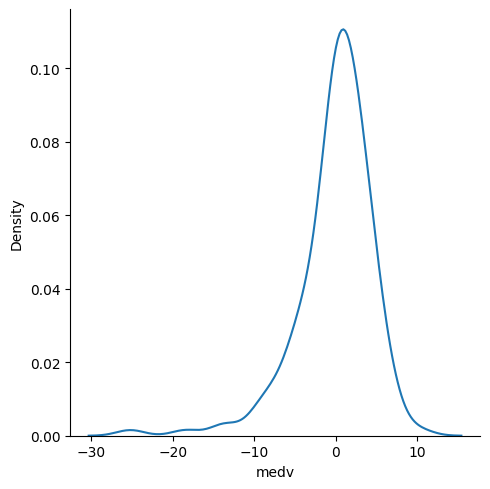

In [26]:
import seaborn as sns
sns.displot(reg_predict - y_test, kind = "kde")

# r2 score

In [27]:
from sklearn.metrics import r2_score
r2_score(reg_predict,y_test)

0.6672877547226223